# TP 3

### Integrantes

- Gimenez, Pablo Eduardo
- Pardo, Sebastián
- González, Martín
- Brazón, Josmar
- Losada, Ricardo
- Meoli, Lucas Pablo

### Tareas y preguntas a resolver:
- ¿Cuáles son las 10 palabras o símbolos más frecuentes en correos SPAM y en correos NO SPAM?
- ¿Hay palabras o símbolos en común?
- ¿Alguna resulta llamativa?
- Separe el conjunto de datos en un conjunto de entrenamiento (70%) y uno de prueba (30%).
- Utilizando un clasificador de Bayes ingenuo, entrene el modelo con el conjunto de entrenamiento.
- Utilizando un clasificador de Regresión Logística, entrene el modelo con el conjunto de entrenamiento (en este caso, normalice los datos).
- Calcule la matriz de confusión en el conjunto de prueba para ambos modelos.
- ¿Qué tipo de error comete más cada modelo?
- ¿Cuál de los dos tipos de error considera más importante en este problema?
- Calcule las métricas de precisión (precision) y recuperación (recall) para ambos modelos.
- ¿Cuál es el mejor modelo según cada métrica?
- ¿Cómo se relacionan estas métricas con los errores analizados en el punto anterior? Fundamente su respuesta.
- Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

# Resolución

### 1. Análisis de los datos

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

In [16]:

# Inicialización de seaborn
sns.set_theme()

# Load del dataset
ds = pd.read_csv("spambase.csv") # Cargamos los datos desde un archivo CSV
ds.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


In [17]:
grouped = ds.groupby(['spam']).sum()
grouped.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
spam,,,,,,,,,,,,,,,,,,,,,
0,204860,681569,559220,2470,504739,124190,26160,107100,106080,466070,...,1159138,800669,22840,142820,140182,442116,63242,306634,32475,60536
1,276190,298510,732080,298550,931799,317050,499309,377360,308320,635470,...,226790,26700,2210,3810,37299,197563,14864,931352,316328,143003


word_freq_you        1270.337877
word_freq_george     1265.265065
word_freq_hp          895.472023
word_freq_will        536.322812
word_freq_your        438.700861
word_freq_hpl         431.993544
word_freq_re          415.759684
word_freq_edu         287.184003
word_freq_address     244.465208
word_freq_meeting     216.807747
dtype: float64


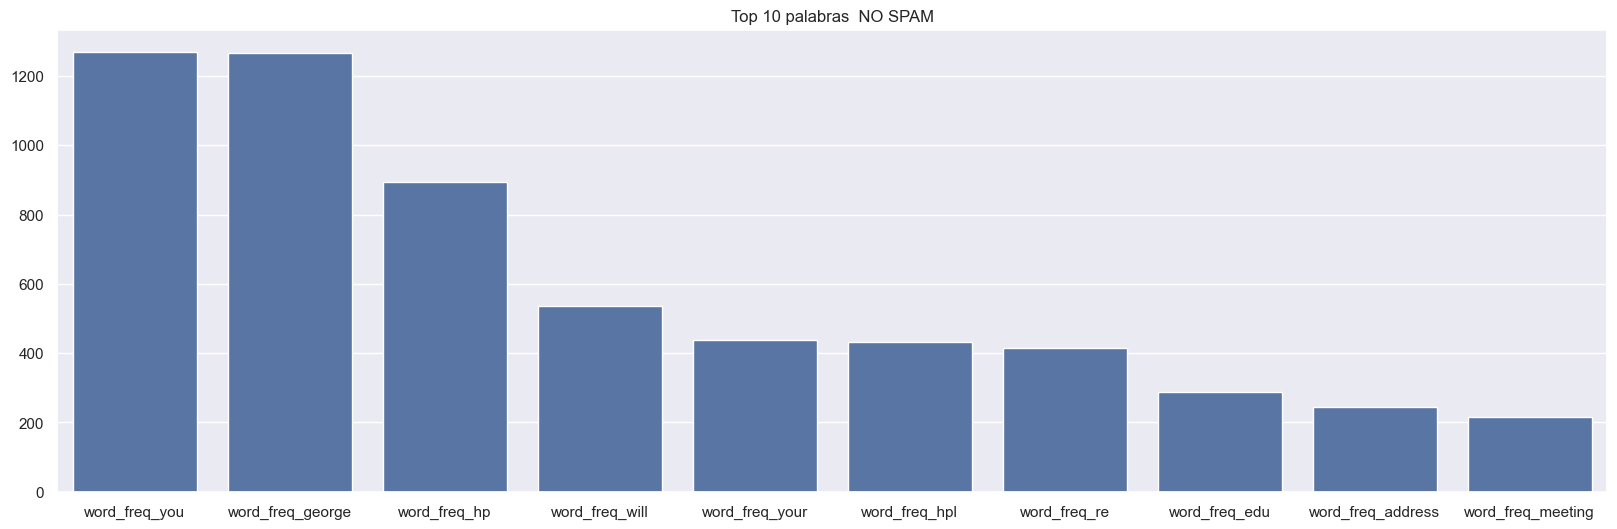

In [18]:
#1.1

from turtle import title

no_spam = ds[ds["spam"] == 0].drop(columns="spam")

top_10_no_spam = no_spam.mean().sort_values(ascending=False).head(10)
print(top_10_no_spam)
plt.subplots(figsize=(20, 6))
graph = sns.barplot(data=top_10_no_spam)
graph.set_title('Top 10 palabras  NO SPAM')
plt.show()

word_freq_you         2264.533370
word_freq_your        1380.362383
word_freq_will         549.972421
word_freq_free         518.361831
word_freq_our          513.954220
char_freq_!            513.707667
word_freq_all          403.794815
word_freq_mail         350.507446
word_freq_email        319.227248
word_freq_business     287.506895
dtype: float64


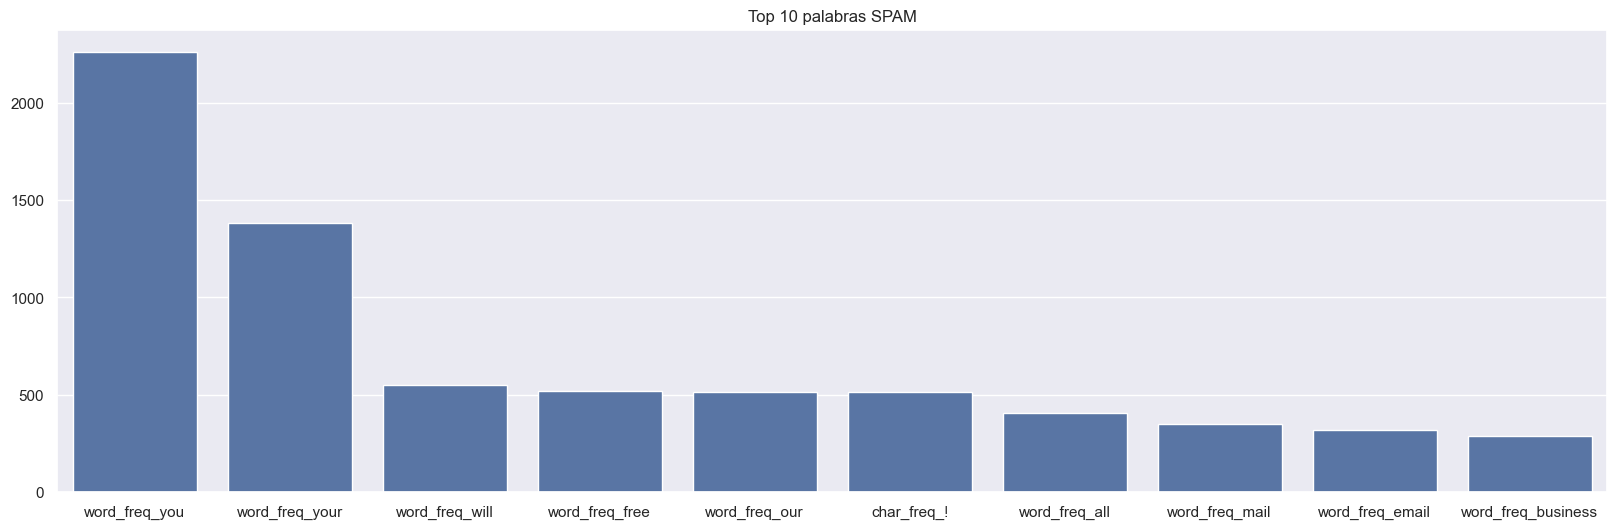

In [19]:

spam = ds[ds["spam"] == 1].drop(columns="spam")

top_10_spam = spam.mean().sort_values(ascending=False).head(10)
print(top_10_spam)
plt.subplots(figsize=(20, 6))
graph_spam = sns.barplot(data=top_10_spam)
graph_spam.set_title('Top 10 palabras SPAM')
plt.show()

Las ocurrencias en común son
['word_freq_you', 'word_freq_your', 'word_freq_will']


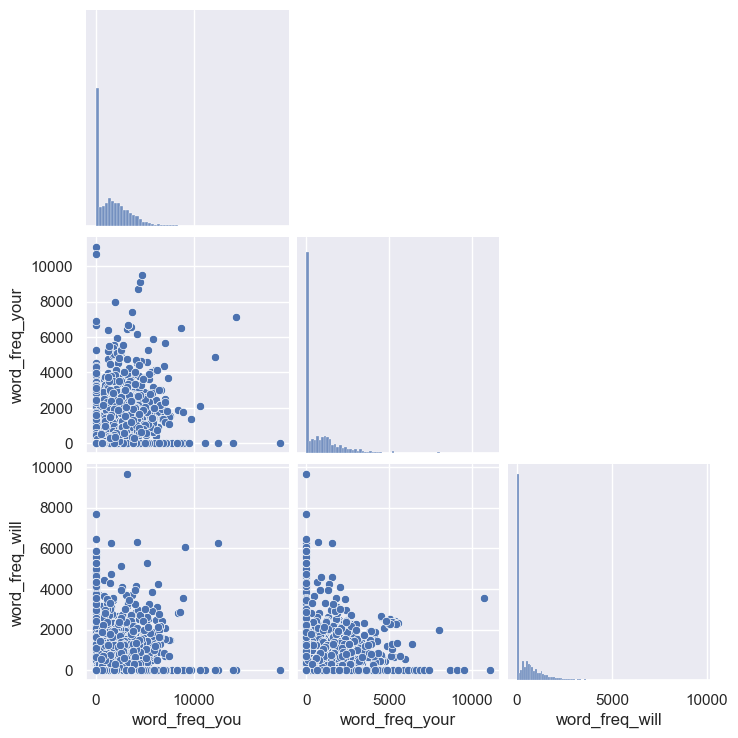

In [20]:
#1.2
matching_words = list(set(top_10_spam.index).intersection(top_10_no_spam.index))
print('Las ocurrencias en común son')
print(matching_words)

dataset_visualization = ds[matching_words]

sns.pairplot(data=dataset_visualization, corner=True);



#### 1.3

Es llamativo que la palabra will este presente en ambos, la traducción literal es voluntad, sin contexto es dificil de interpretar.

### 2. Entrenamiento

In [21]:
# Imports comunes
from sklearn.metrics import confusion_matrix

In [22]:
# Generacion de los sets de entrenamiento y pruebas
X = ds.drop(columns='spam')
y = ds['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_temp, X_val, y_train_temp, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

### Bayesiano Ingenuo

In [23]:
from sklearn.naive_bayes import MultinomialNB

model_bi = MultinomialNB()

# Entrenar
model_bi.fit(X_train_temp, y_train_temp)

# Predecir
y_pred_bi = model_bi.predict(X_test)

# Matriz de confusion
cm_bi = confusion_matrix(y_test, y_pred_bi) 


### Regresion Logistica

In [24]:
# Regresion Logistica
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression



In [25]:

# Preprocesamiento para las columnas
cols = list(X_train.columns)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols) 
    ]
)

# Pipeline: preprocesamiento + modelo
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(random_state=0))
])

# Entrenar
log_reg_pipeline.fit(X_train, y_train)

# Predecir
y_pred_log_reg = log_reg_pipeline.predict(X_test)

# Matriz de confusion
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg) 


### Matrices de confusion

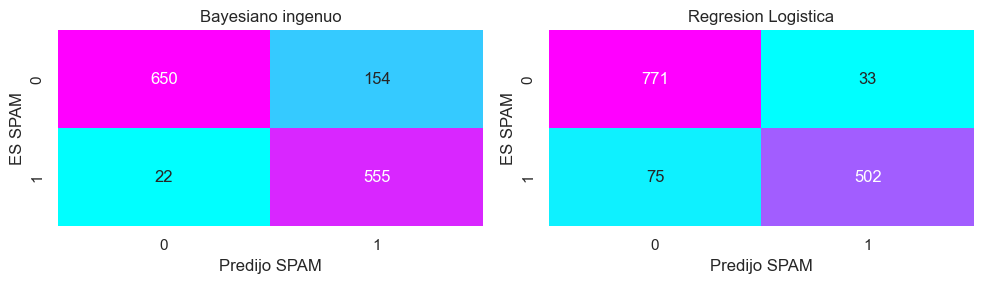

In [26]:
titles = ["Bayesiano ingenuo", "Regresion Logistica"]
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
cms = [cm_bi, cm_log_reg]

for ax, cm, title in zip(axes, cms, titles):
    sns.heatmap(cm, annot=True, fmt="d", cmap="cool", cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predijo SPAM")
    ax.set_ylabel("ES SPAM")
    

plt.tight_layout()
plt.show()


### ¿ Que tipos de error comete mas cada modelo ?

El modelo **Bayesiano Ingenuo** predice mejor los correos SPAM. 

El modelo de **Regresion Logistica** predice mejor los correos NO SPAM. 

In [27]:
def metricas(cm):
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    Sensibilidad = TP / (TP + FN)
    Especificidad = TN / (TN + FP)
    Precision = TP / (TP + FP)
    return {
        "sensibilidad" : Sensibilidad,
        "especificidad" : Especificidad,
        "precision" : Precision,
        "recall" : Sensibilidad
    }
    
metricas_bi = metricas(cm_bi)
metricas_log_reg = metricas(cm_log_reg)


print(f"\t\tBayesiano Ingenuo\t\tRegresion Logistica")
print(f"\t\t===================================================")
print(f"Sensibilidad\t{metricas_bi['sensibilidad']}\t\t{metricas_log_reg['sensibilidad']}")
print(f"Especificidad\t{metricas_bi['especificidad']}\t\t{metricas_log_reg['especificidad']}")


		Bayesiano Ingenuo		Regresion Logistica
Sensibilidad	0.9618717504332756		0.8700173310225303
Especificidad	0.8084577114427861		0.9589552238805971


### ¿ Cual de los dos tipos de error considera mas importante en este modelo ?

El error mas importante, en donde el modelo deberia tratar de equivocarse lo **MENOS** posible, es el de **Especificidad**. Este error considera los **FALSOS POSITIVOS** los cuales idealmente deberian ser 0 ya que corresponden a los correos que **NO son SPAM** pero el modelo identifica como **SPAM**.

### Calcule Presicion y Recall para ambos modelos

In [28]:
print(f"\t\tBayesiano Ingenuo\t\tRegresion Logistica")
print(f"\t\t===================================================")
print(f"Precision\t{metricas_bi['precision']}\t\t{metricas_log_reg['precision']}")
print(f"Recall\t\t{metricas_bi['recall']}\t\t{metricas_log_reg['recall']}")

		Bayesiano Ingenuo		Regresion Logistica
Precision	0.7827926657263752		0.9383177570093458
Recall		0.9618717504332756		0.8700173310225303


### ¿ Cual es el mejor modelo segun cada metrica ? ¿ Como se relacionan todas la metricas?

**Sensibilidad/Recall:** Un valor mas pequeño indica que es mas probable que se confunda un mensaje que **SI** es SPAM por uno que **NO** lo es.
Desde el punto de vista del indicador, el mejor modelo es el **Bayesiano Ingenuo** dado que su Sensibilidad es mayor. Igualmente, el efecto concreto que tiene esto es que el usuario recibira correos en su bandeja de entrada que no deberia pero facilmente puede detectar el mismo que son SPAM e ignorarlos.

**Especificidad:** Un valor mas pequeño indica que es probable que se confunda un mensaje que **NO** es SPAM por uno que **SI** lo es. Desde el punto de vista del indicador, el mejor modelo es el **Regresion Logistica** dado que su Especificidad es mayor. En este caso, el efecto concreto que tiene esto es que el usuario **NO** recibira en su bandeja de entrada un correo que **NO** es SPAM y eso en definitiva podria hacerle no ver un correo que era importante.

**Precision:** Un valor mas alto indica que cuando el clasificador considera que el correo **SI** es SPAM, es muy probable que lo sea. Desde el punto de vista del indicador, el mejor modelo es el **Regresion Logistica** dado que su Especificidad es mayor. En este caso otra vez esto es importante que sea lo mejor posible para esta aplicacion dado que el usuario puede tener mayor seguridad de que si el mensaje fue clasificado como SPAM probablemente lo sea.


    

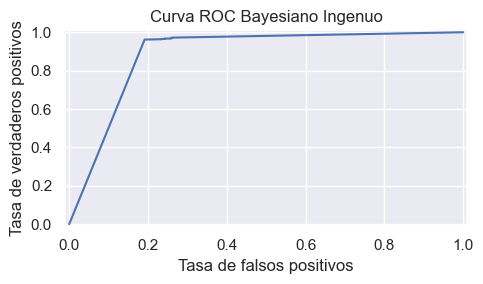

In [29]:
from sklearn.metrics import roc_curve

p_pred = model_bi.predict_proba(X_test)


fpr, tpr, thr = roc_curve(y_test, p_pred[:, 1])

plt.figure(figsize=(5, 3))
plt.title("Curva ROC Bayesiano Ingenuo")
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.tight_layout();

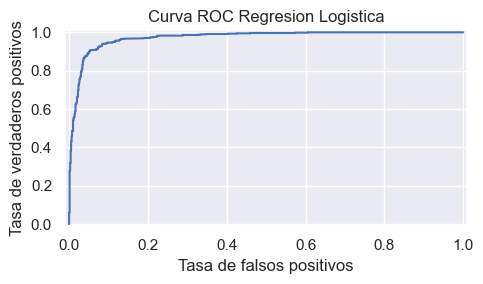

In [30]:
p_pred = log_reg_pipeline.predict_proba(X_test)


fpr, tpr, thr = roc_curve(y_test, p_pred[:, 1])

plt.figure(figsize=(5, 3))
plt.title("Curva ROC Regresion Logistica")
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.tight_layout();

In [31]:
from sklearn.metrics import roc_auc_score

print(f"AUC: {roc_auc_score(y_test, p_pred[:, 1])}")

AUC: 0.9726378937203065
